In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [130]:
f = lambda x: 1.7*x + 3

x = np.linspace(0,10,100)
y = f(x)

y += np.random.normal(2, size=len(x))
out_x = np.random.uniform(0,10,200)
out_y = np.random.uniform(0,25,200)

In [132]:
data = np.c_[np.r_[x, out_x], np.r_[y, out_y]]

In [164]:
def ransac_plot(n, x, y, m, c, final=False, x_in=(), y_in=(), points=()):
    plt.plot(x, y, marker='o', label='Input points', color='#00cc00', linestyle='None', alpha=0.4)
    plt.plot(x, m*x + c, 'r', label='Line model', color='r', linewidth=1)

In [165]:
class RANSAC():
    def __init__(self, threshold=3, inl_ratio=0.6):
        self.thr = threshold
        self.inl_r = inl_ratio
        self.k = 0
        self.b = 0
        
    def fit(self, data, max_iter=100):
        ratio = 0
        idx = np.arange(len(data))
        for i in range(max_iter):
            np.random.shuffle(idx)
            
            train = data[idx[:2]]
            test = data[idx[2:]]
            
            k, b = self._find_line_model(train)
            n_inliers = sum(
                map(self._out_checker(k, b), test)
            )
            if n_inliers/len(data) > ratio:
                ratio = n_inliers / len(data)
                self.k = k
                self.b = b
            if n_inliers > len(data) * self.inl_r:
                break
                
    def _find_line_model(self, points):
        # y = k*x + b
        k = (points[1,1] - points[0,1]) / (points[1,0] - points[0,0] + 1e-6)
        b = points[1,1] - k * points[1,0]

        return k, b

    def _out_checker(self, k, b):
        def f(p):
            x = (p[0] + k*p[1] - k*b)/(1 + k**2)
            y = (k*p[0] + (k**2)*p[1] - (k**2)*b)/(1 + k**2) + b
            dist = np.linalg.norm(p - (x,y))
            return dist < self.thr
        return f

In [166]:
r = RANSAC(1, 0.7)
r.fit(data)

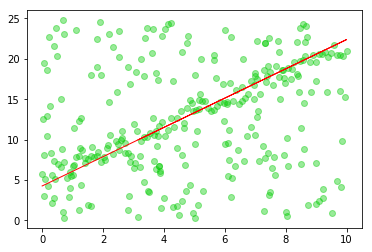

In [167]:
# # plot the final model
ransac_plot(0, data[:,0],data[:,1], r.k, r.b, True)